In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('COVID_paper/data2020_04_11.csv',encoding="gbk")

In [3]:
#查看前五行数据
data.head()

,title,link,journal,time,abstract
0,Using text mining to track outbreak trends in ...,http://medrxiv.org/cgi/content/short/2020.01.1...,medRxiv,2020/1/13,Objectives: ProMED-mail (Program for Monitorin...
1,A mathematical model for simulating the transm...,http://biorxiv.org/cgi/content/short/2020.01.1...,bioRxiv,2020/1/19,"As reported by the World Health Organization, ..."
2,Genomic and protein structure modelling analys...,http://biorxiv.org/cgi/content/short/2020.01.2...,bioRxiv,2020/1/21,Detailed genomic and structure-based analysis ...
3,Cross‐species transmission of the newly identi...,https://onlinelibrary.wiley.com/doi/10.1002/jm...,Journal of Medical Virology,2020/1/22,The current outbreak of viral pneumonia in the...
4,Functional assessment of cell entry and recept...,http://biorxiv.org/cgi/content/short/2020.01.2...,bioRxiv,2020/1/22,"Over the past 20 years, several coronaviruses ..."


In [4]:
#查看数据类型及个数
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 5 columns):
title       1644 non-null object
link        1644 non-null object
journal     1644 non-null object
time        1644 non-null object
abstract    1644 non-null object
dtypes: object(5)
memory usage: 64.3+ KB


In [5]:
#查看journal的类别
data["journal"].value_counts()

medRxiv                                     1201
bioRxiv                                      334
Eurosurveillance                              29
Journal of Medical Virology                   15
The Lancet                                    12
The Lancet Infectious Diseases                 9
NEJM                                           8
Nature                                         7
Viruses                                        4
Nature Medicine                                2
The Lancet Public Health                       2
Pediatric Pulmonology                          2
Nature Microbiology                            2
Cell Discovery                                 2
Journal of Thrombosis and Haemostasis          1
International Journal of Oral Science          1
The Lancet Digital Health                      1
The Lancet Global Health                       1
Journal of Evidence‐Based Medicine             1
Arthritis & Rheumatology                       1
Scientific Data     

Text(0.5, 1.0, 'Journal ratio')

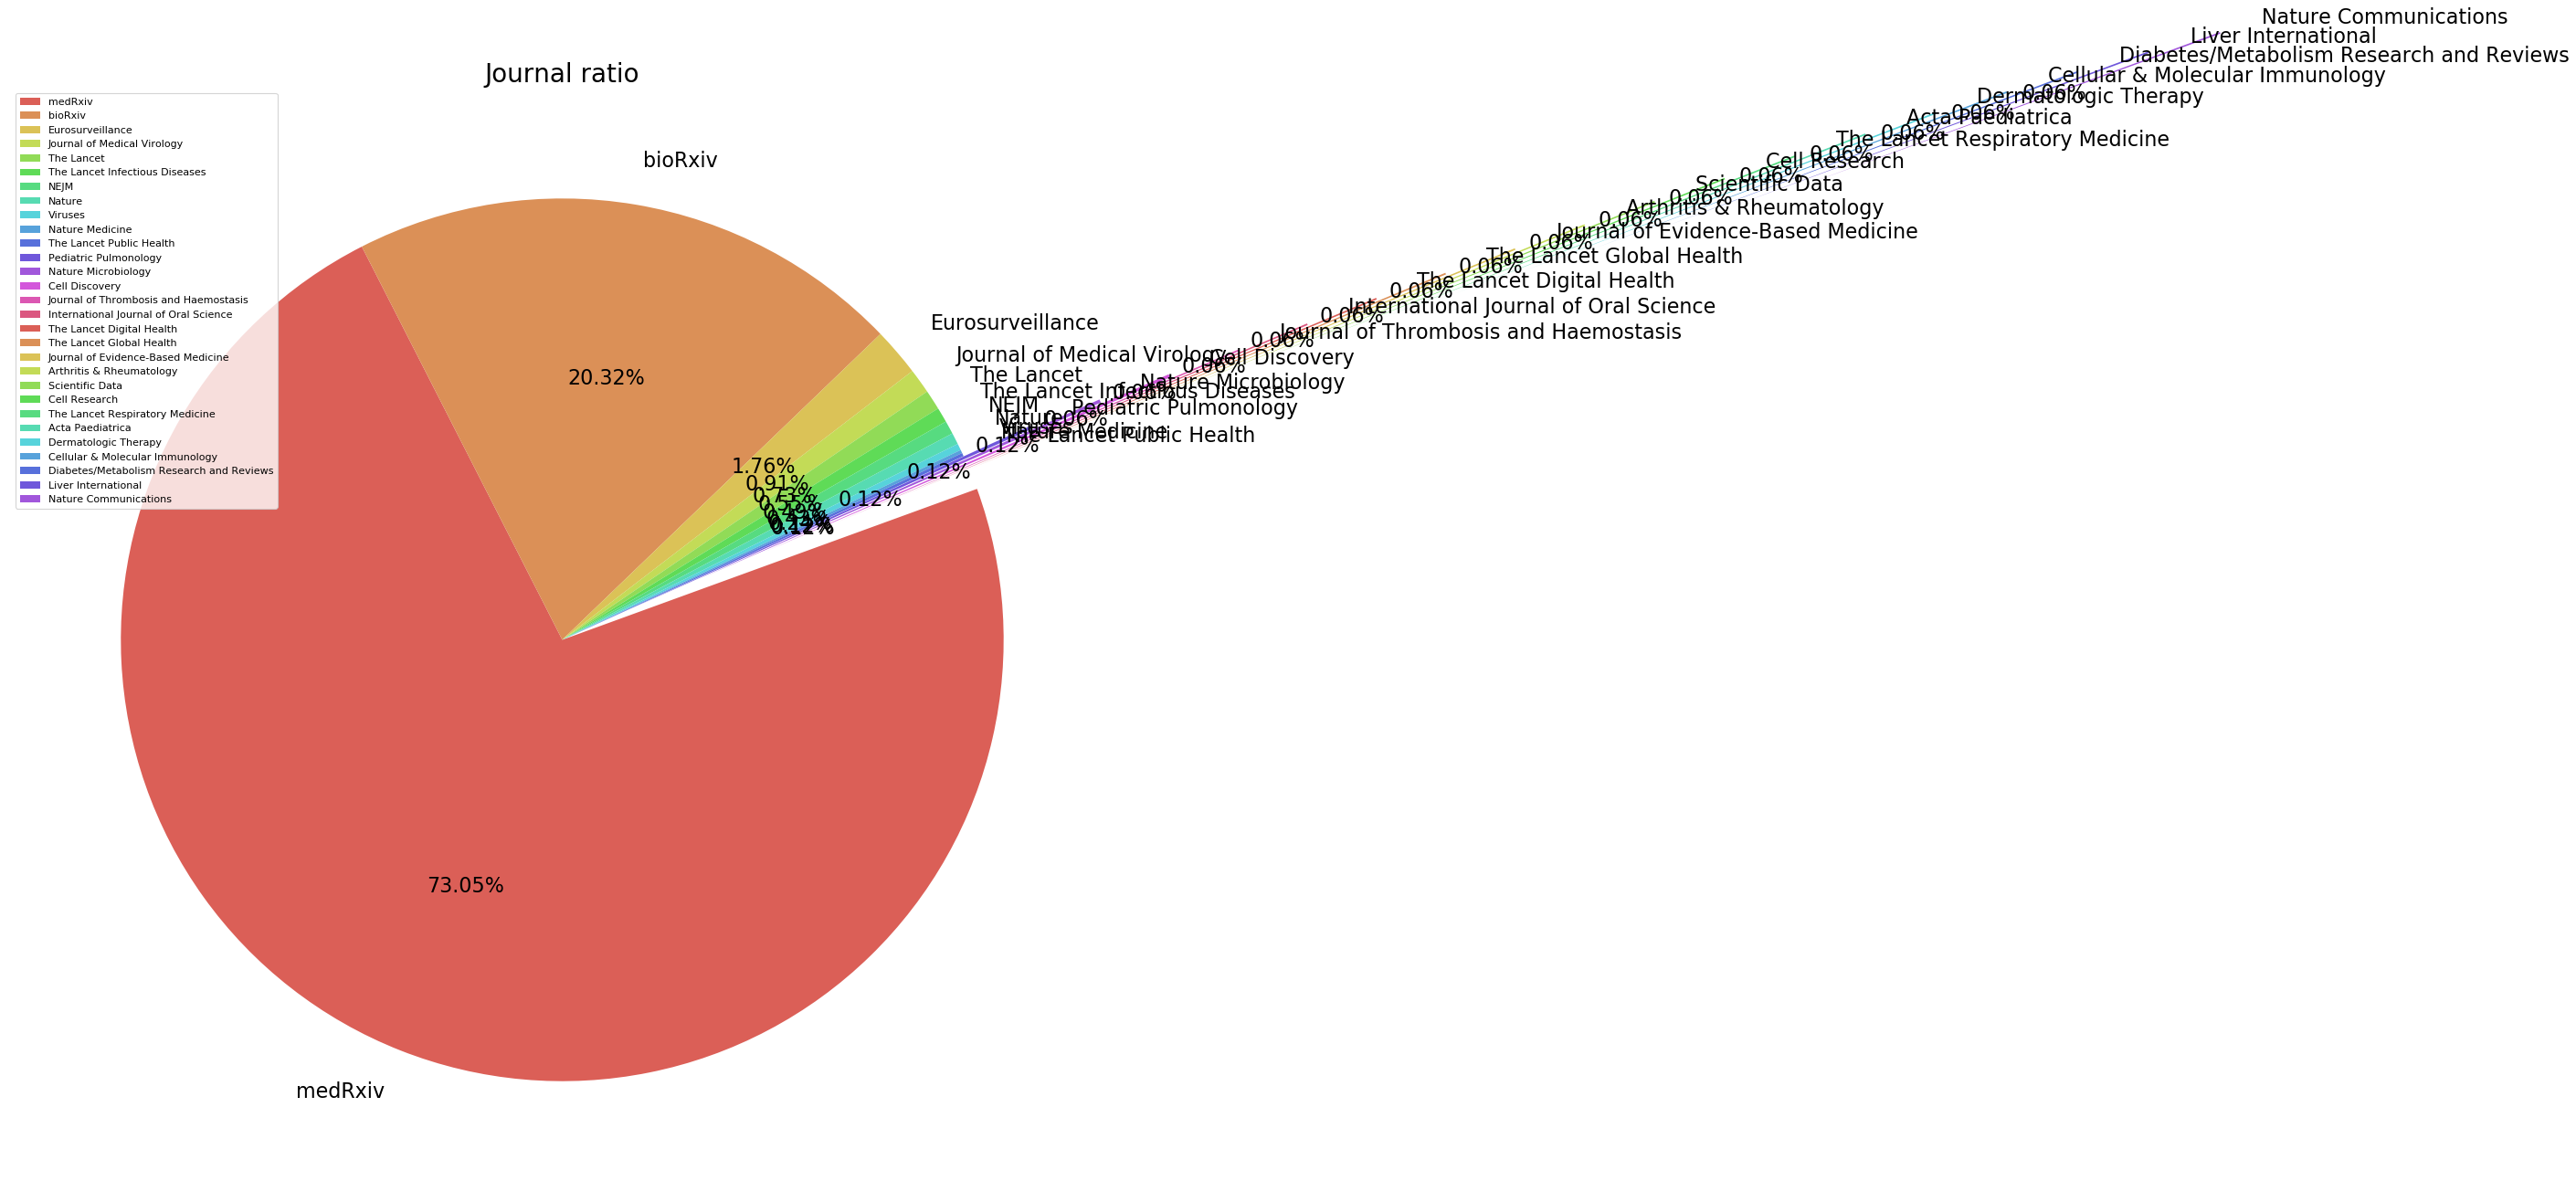

In [11]:
#画出各期刊占比图
journal_data=data['journal'].value_counts()
plt.figure(figsize=(20,20),dpi=80) 
explode =np.hstack((np.zeros(10),np.linspace(0,3,len(journal_data)-10)))
plt.pie(journal_data,labels=journal_data.index,
        textprops= {'fontsize':20,'color':'black'},
        autopct='%.2f%%', startangle=20,counterclock=False,
        colors=sns.color_palette('hls',n_colors=16),explode=explode)
plt.legend(loc='best')
plt.title('Journal ratio',fontsize=25)

Text(0.5, 1.0, 'Journal ratio')

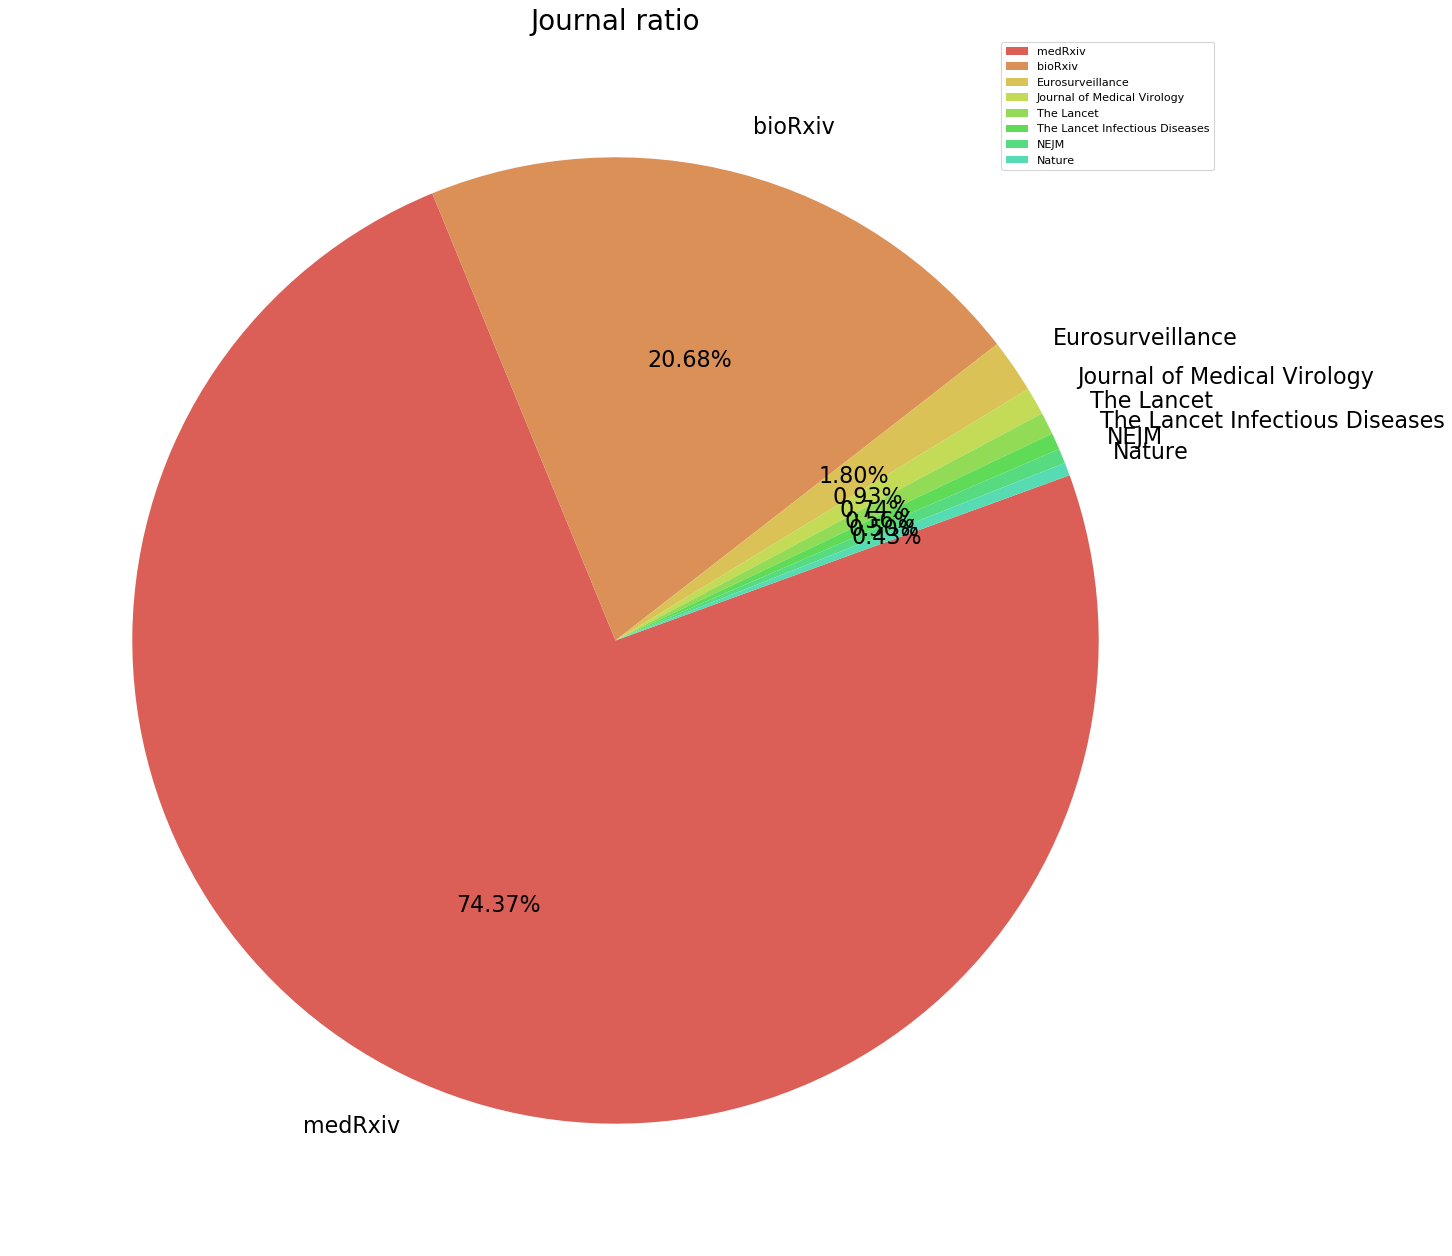

In [13]:
#画出数量超过5的各期刊占比图
journal_data1=journal_data[journal_data>5] 
plt.figure(figsize=(20,20),dpi=80) 
plt.pie(journal_data1,labels=journal_data1.index,
        textprops= {'fontsize':20,'color':'black'},
        autopct='%.2f%%', startangle=20,counterclock=False,
        colors=sns.color_palette('hls',n_colors=16)) 
plt.legend(loc='best')
plt.title('Journal ratio',fontsize=25)

In [14]:
data["time"].value_counts()

2020/3/30    118
2020/4/11    116
2020/4/6      92
2020/3/27     82
2020/4/7      67
2020/3/20     63
2020/4/10     55
2020/3/6      47
2020/3/23     44
2020/4/1      40
2020/3/17     40
2020/3/31     39
2020/2/23     33
2020/4/3      33
2020/3/26     32
2020/2/20     31
2020/4/8      30
2020/4/2      29
2020/3/3      29
2020/3/16     28
2020/3/13     27
2020/2/27     27
2020/2/25     27
2020/3/10     25
2020/3/24     24
2020/3/8      24
2020/4/9      23
2020/3/18     22
2020/3/12     21
2020/2/11     21
            ... 
2020/2/24      8
2020/1/24      7
2020/3/19      7
2020/2/19      6
2020/2/14      6
2020/1/29      5
2020/1/31      5
2020/2/3       5
2020/3/29      5
2020/1/23      4
2020/2/28      4
2020/3/1       4
2020/1/25      4
2020/1/26      3
2020/3/9       3
2020/2/9       3
2020/2/6       3
2020/2/7       3
2020/1/22      2
2020/3/4       2
2020/3/11      2
2020/3/22      2
2020/1/19      1
2020/2/8       1
2020/3/15      1
2020/1/21      1
2020/2/15      1
2020/2/10     

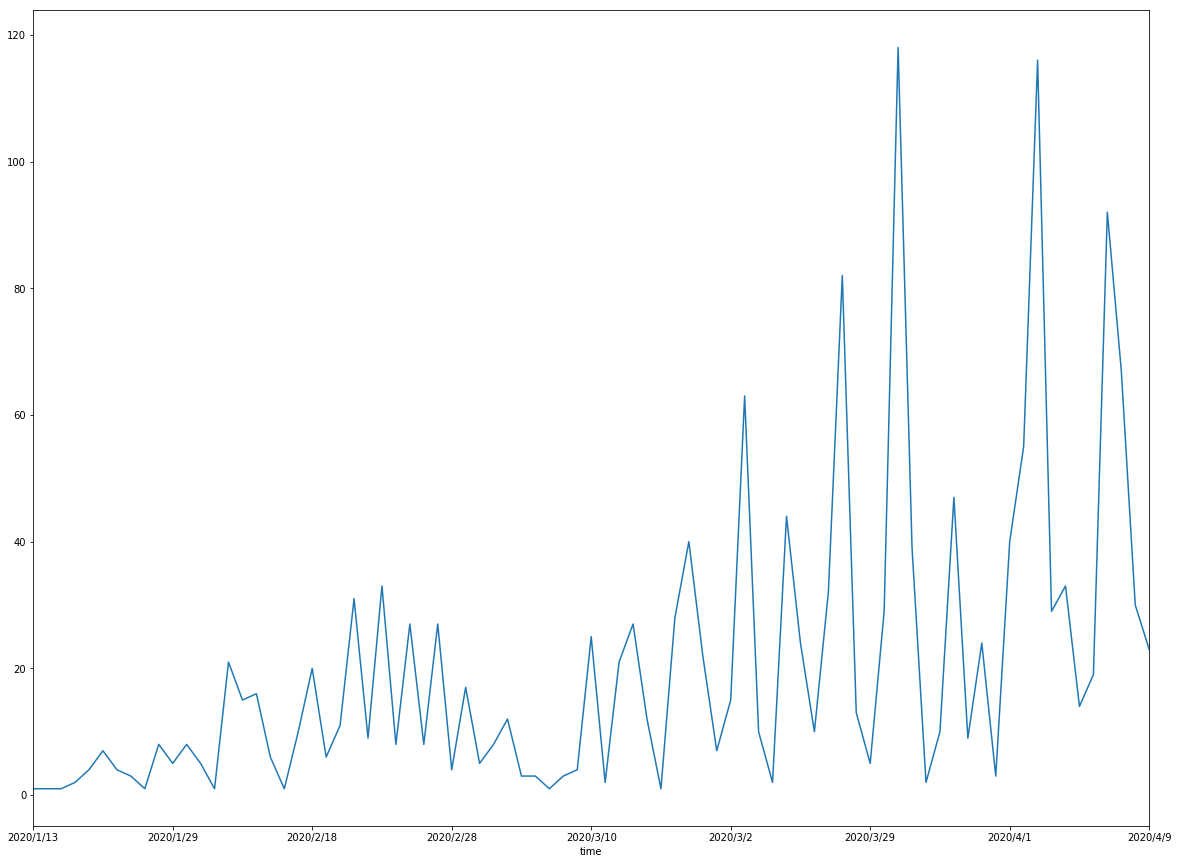

In [16]:
#画出每日论文发表数量折线图
plt.figure(figsize=(20,15))
data.groupby('time')['journal'].count().plot()

In [17]:
#统计每天各journal的论文数
journal_daily=pd.crosstab(data['time'], data['journal'])
journal_index=journal_data.index
journal_daily=journal_daily[journal_index]
journal_daily.head()

journal,medRxiv,bioRxiv,Eurosurveillance,Journal of Medical Virology,The Lancet,The Lancet Infectious Diseases,NEJM,Nature,Viruses,Nature Medicine,...,Arthritis & Rheumatology,Scientific Data,Cell Research,The Lancet Respiratory Medicine,Acta Paediatrica,Dermatologic Therapy,Cellular & Molecular Immunology,Diabetes/Metabolism Research and Reviews,Liver International,Nature Communications
time,,,,,,,,,,,,,,,,,,,,,
2020/1/13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/19,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/22,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/23,0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
journal_daily=pd.DataFrame(journal_daily)
journal_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2020/1/13 to 2020/4/9
Data columns (total 29 columns):
medRxiv                                     81 non-null int64
bioRxiv                                     81 non-null int64
Eurosurveillance                            81 non-null int64
Journal of Medical Virology                 81 non-null int64
The Lancet                                  81 non-null int64
The Lancet Infectious Diseases              81 non-null int64
NEJM                                        81 non-null int64
Nature                                      81 non-null int64
Viruses                                     81 non-null int64
Nature Medicine                             81 non-null int64
The Lancet Public Health                    81 non-null int64
Pediatric Pulmonology                       81 non-null int64
Nature Microbiology                         81 non-null int64
Cell Discovery                              81 non-null int64
Journal of Thrombosi

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 <a list of 81 Text xticklabel objects>)

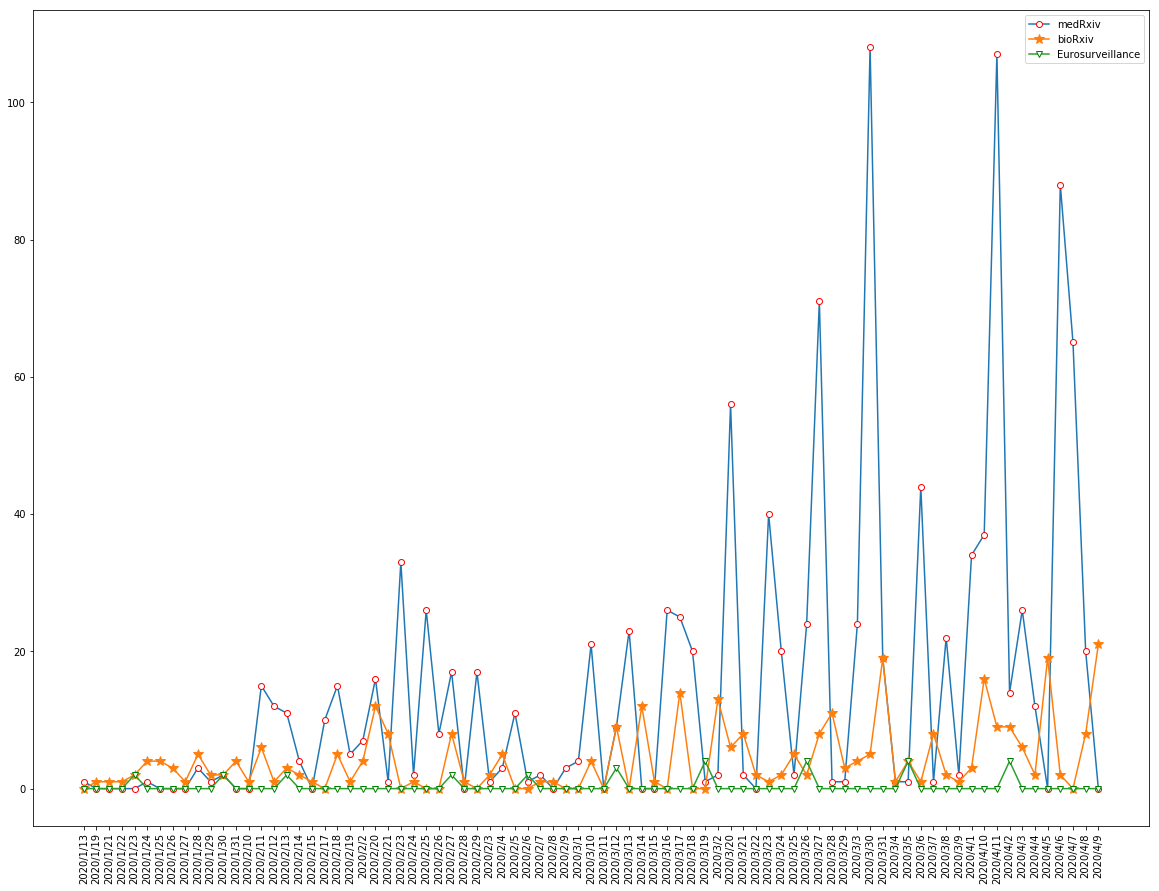

In [19]:
plt.figure(figsize=(20,15))
plt.plot(journal_daily['medRxiv'], marker='o', mec='r', mfc='w',label='medRxiv')
plt.plot(journal_daily['bioRxiv'], marker='*', ms=10,label='bioRxiv')
plt.plot(journal_daily['Eurosurveillance'], marker='v', mec='g', mfc='w',label='Eurosurveillance')
plt.legend()  # 让图例生效
plt.xticks(rotation=90)

In [20]:
times = data['time']
t= pd.to_datetime(pd.Series(times), format='%Y-%m-%d')
t.index = t.dt.to_period('m')#参数 M 表示月份，Q 表示季度，A 表示年度，D 表示按天
t=t.groupby(level=0).size()
t= t.reindex(pd.period_range(t.index.min(), t.index.max(), freq='m'), fill_value=0)
print (t)

2020-01     50
2020-02    306
2020-03    770
2020-04    518
Freq: M, Name: time, dtype: int64


In [21]:
#根据期刊对数据分组
def journal_group(data,journal_index):
    return(data[data['journal']==journal_index])
 
data0=journal_group(data,journal_index[0])
data1=journal_group(data,journal_index[1])
data2=journal_group(data,journal_index[2])
data3=journal_group(data,journal_index[3])
data4=journal_group(data,journal_index[4])
data5=journal_group(data,journal_index[5])
data6=journal_group(data,journal_index[6])
data7=journal_group(data,journal_index[7])

Text(0.5, 1.0, 'medRxiv每日发表论文数')

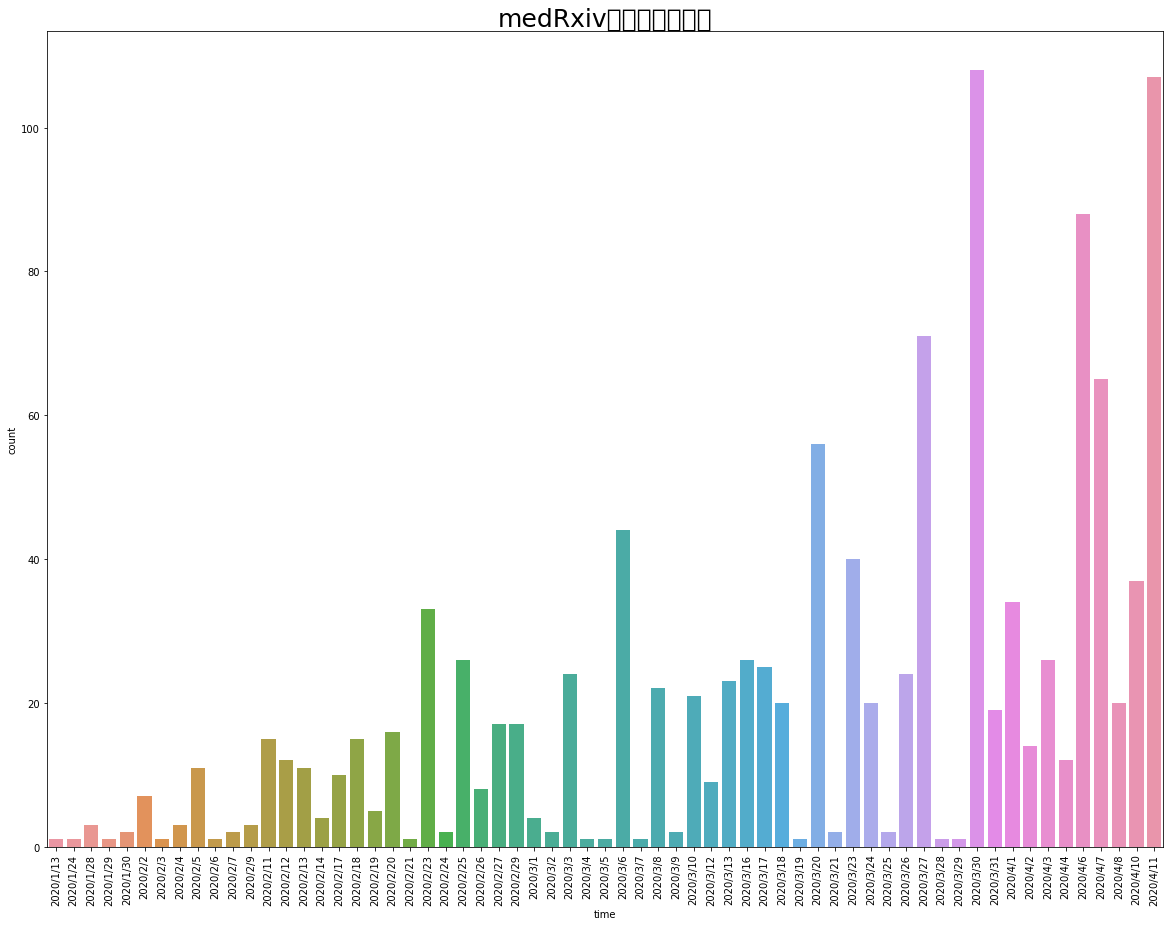

In [22]:
#medRxiv每日发表数量条形图
# -*- coding: UTF-8 -*-
f,ax=plt.subplots(figsize=(20,15))
sns.countplot(x='time',data=data0)  ##data可修改为其他数据框
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('medRxiv每日发表论文数',fontsize=25)

Text(0.5, 1.0, 'bioRxiv每日发表论文数')

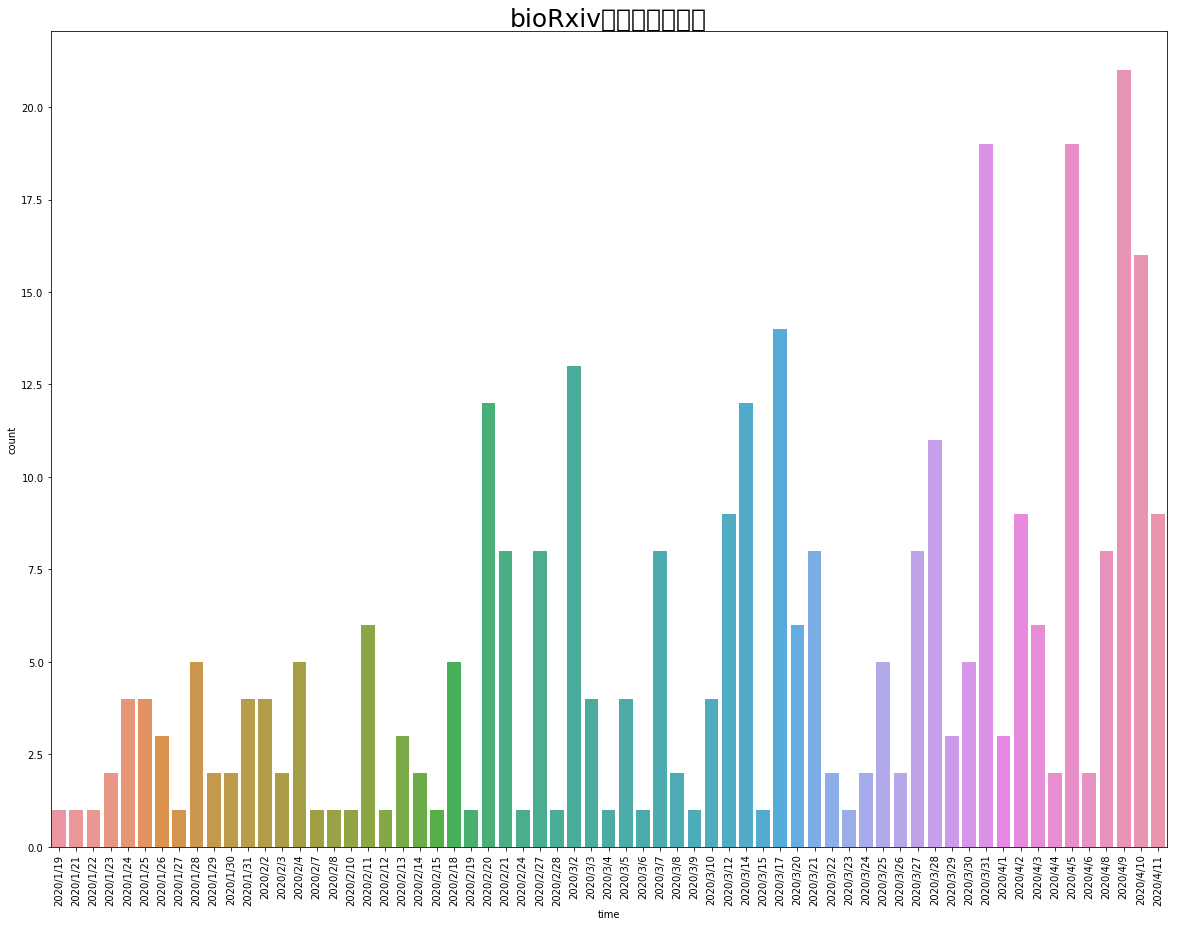

In [23]:
#bioRxiv每日发表数量条形图
f,ax=plt.subplots(figsize=(20,15))
sns.countplot(x='time',data=data1)  ##data可修改为其他数据框
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('bioRxiv每日发表论文数',fontsize=25)